**Question 1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

**Answer 1:** The number of multiplications we need to perform a matrix multiplication between a (n,k) and (k,m) matrix is n * k * m. This is because, for each element in the resultant matrix, we need to do k multiplications because we need to multi every element of a particular row of first matrix to every element of the corresponding column of the second matrix. And since the number of elements in resulting matrix is n * m, therefore total number of multiplications will be k * n * m.

The total number of additions will be n * (k-1) * m because for every element in the resultant matrix, we need to sum k products, and thus, the number of additions will be k-1. Since we have n* m such elements the total number of additions performed will be n* (k-1) * m.

**Question 2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

Using nested lists:

In [12]:
import time

#The following function is for multiplying matrices
def multiply_matrices(matrix1, matrix2):
    result = [[0 for i in range(len(matrix2[0]))] for i in range(len(matrix1))]
    
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    
    return result

# Defining the matrices
matrix1 = [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]

matrix2 = [[10, 11],
           [12, 13],
           [14, 15]]

# Multiplying matrices using lists of lists
start_time = time.time()
result_lists = multiply_matrices(matrix1, matrix2)
end_time = time.time()
execution_time_lists = end_time - start_time

print("Result using lists of lists:")
for row in result_lists:
    print(row)

print("Time taken without using numpy: {:.10f} seconds".format(execution_time_lists))

Result using lists of lists:
[76, 82]
[184, 199]
[292, 316]
Time taken without using numpy: 0.0000000000 seconds


Using numpy:

In [7]:
import numpy as np
import time

# Defining the matrices as numpy arrays
matrix1= np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])

matrix2= np.array([[10, 11],
                    [12, 13],
                    [14, 15]])

# Multiplying matrices using numpy
start_time= time.time()
result_numpy= np.dot(matrix1, matrix2)
end_time= time.time()
execution_time_numpy= end_time - start_time

print("Result using numpy:")
print(result_numpy)
print("Time taken using numpy: {:.10f} seconds".format(execution_time_numpy))

Result using numpy:
[[ 76  82]
 [184 199]
 [292 316]]
Time taken using numpy: 0.0009984970 seconds


We see that using nested lists shows zero seconds whereas using numpy time taken is more. I don't know the exact reason why this is happening but I am guessing it is happening because of more loading time and complexity while using numpy. For larger matrixes maybe numpy becomes better than the nested lists method.

**Question: 4 What is the gradient of the following function with respect to x and y?**


In [17]:
import numpy as np
#function is defined
def f(x,y):
    return y*x**2+np.sin(x)*y**3

# Assumed/Example values for x and y to print out the value of the gradient
x=1
y=2

# Analytical gradient
grad_analytical=(2*x*y+np.cos(x)*y**3,x**2+np.sin(x)*3*y**2)
# print(grad_analytical)
print(f"analytical gradient at (x,y)=({x},{y}):{grad_analytical}") #The value of trignometric functions are in radians.

analytical gradient at (x,y)=(1,2):(np.float64(8.322418446945118), np.float64(11.097651817694757))


**Question: 5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [22]:
import jax.numpy as jnp
from jax import grad
import numpy as np

# Function is defined
def f(x,y):
    return x**2*y+y**3*jnp.sin(x)
# Computing the gradient using in built function
gradf = grad(f,argnums=(0,1))
#values for x and y
x=1.0
y=2.0
# Analytical gradient using numpy
gradAnalytical=(2*x*y+y**3*np.cos(x),x**2+3*y*2*np.sin(x))
# Gradient using JAX
gradientjax = gradf(x,y)

print(f"analytical gradient at (x, y) = ({x}, {y}): {gradAnalytical}")
print(f"JAX Gradient at (x, y) = ({x}, {y}): {gradientjax}")

analytical gradient at (x, y) = (1.0, 2.0): (np.float64(8.322418446945118), np.float64(11.097651817694757))
JAX Gradient at (x, y) = (1.0, 2.0): (Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))


**Question 6: Use sympy to confirm that you obtain the same gradient analytically.**

In [4]:
import sympy as sp
# Defining symbols
x,y=sp.symbols('x y')

#function
f=x**2*y+y**3*sp.sin(x)
#gradient
gradf=[sp.diff(f,var) for var in (x,y)]
#computing the gradient at x=1, y=2
grad_evaluated=[g.evalf(subs={x:1.0,y:2.0}) for g in gradf]

gradf, grad_evaluated

([2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)],
 [8.32241844694512, 11.0976518176948])

**Question 7: Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2**

Following is the code:

In [14]:
student_records = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {'Maths': 100,'English': 70
                # Will add more subjects and marks as needed
                     }
        },
        'Branch 2': {}
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}

# Accessing and modifying the nested dictionary
student_records[2022]['Branch 1']['Marks']['Science'] = 90
student_records[2023]['Branch 2']['Roll Number'] = 2

# Printing the nested dictionary
print(student_records)

{2022: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70, 'Science': 90}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {'Roll Number': 2}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


**Question 8: Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

Answer 8: Following is the code:

In [15]:
class Student:
    def __init__(self, name, roll_number):
        self.name = name
        self.roll_number = roll_number
        self.marks = {}

    def add_marks(self, subject, marks):
        self.marks[subject] = marks
#Defining the student class to store its information

class Branch:
    def __init__(self):
        self.students = []
#Defining the branch of the students

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []


# Creating the overall database as a list of Year objects
database = []

# Creating Year objects and adding them to the database that we created 
year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)

database.append(year_2022)
database.append(year_2023)
database.append(year_2024)
database.append(year_2025)

# Creating Branch objects and adding them to the respective Year objects
branch_2022_1 = Branch()
branch_2022_2 = Branch()
year_2022.branches.append(branch_2022_1)
year_2022.branches.append(branch_2022_2)

branch_2023_1 = Branch()
branch_2023_2 = Branch()
year_2023.branches.append(branch_2023_1)
year_2023.branches.append(branch_2023_2)

branch_2024_1 = Branch()
branch_2024_2 = Branch()
year_2024.branches.append(branch_2024_1)
year_2024.branches.append(branch_2024_2)

branch_2025_1 = Branch()
branch_2025_2 = Branch()
year_2025.branches.append(branch_2025_1)
year_2025.branches.append(branch_2025_2)

# Creating Student objects and adding them to the respective Branch objects
student_2022_1 = Student('N', 1)
student_2022_2 = Student('M', 2)
branch_2022_1.students.append(student_2022_1)
branch_2022_2.students.append(student_2022_2)

student_2023_1 = Student('P', 3)
student_2023_2 = Student('Q', 4)
branch_2023_1.students.append(student_2023_1)
branch_2023_2.students.append(student_2023_2)

# Adding marks for students
student_2022_1.add_marks('Maths', 100)
student_2022_1.add_marks('English', 70)
student_2023_1.add_marks('Science', 90)

# Accessing and modifying the data
print(database[0].year)  # Output: 2022
print(database[0].branches[0].students[0].name)  # Output: N
print(database[0].branches[0].students[0].marks)  # Output: {'Maths': 100, 'English': 70}

2022
N
{'Maths': 100, 'English': 70}


**Question 9: Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

 
 


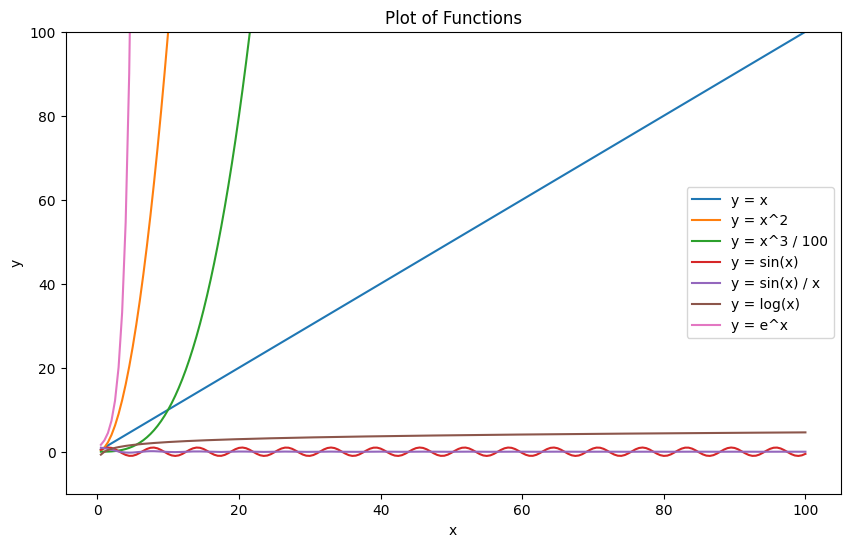

In [5]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0.5, 100.5, 0.5)  # Defining the domain

# Defining the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Plotting the functions
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = x^2')
plt.plot(x, y3, label='y = x^3 / 100')
plt.plot(x, y4, label='y = sin(x)')
plt.plot(x, y5, label='y = sin(x) / x')
plt.plot(x, y6, label='y = log(x)')
plt.plot(x, y7, label='y = e^x')

# Setting the plot title and labels
plt.title('Plot of Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10, 100)   # Setting the y-axis limits for zooming in
plt.legend()  # Adding  legend

# Showing the plot
plt.show()
#We note that the starting point of all the graphs is still not visible, but this much magnified works pretty well for clarity. Also I took help of my probability course which taught me how to plot the graphs.


**Question 10: Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [6]:
import numpy as np
import pandas as pd

#matrix with random numbers
matrix = np.random.uniform(1,2,size=(20,5))

#DataFrame and columns
df = pd.DataFrame(matrix,columns=["a","b","c","d","e"])

#column with the highest standard deviation
std_devs=df.std()
max_stddev_column=std_devs.idxmax()

#row with the lowest mean
means=df.mean(axis=1)
minmean_row=means.idxmin()

# Print the results
print(f"column with the highest standard deviation:{max_stddev_column}")
print(f"row with the lowest mean:{minmean_row}")
#In built fuctions reference was taken from the python documentation provided on the web

column with the highest standard deviation:a
row with the lowest mean:14


**Question 11: Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [7]:
import numpy as np
import pandas as pd
# matrix with random numbers
matrix=np.random.uniform(1,2,size=(20, 5))

#DataFrame and the columns
df=pd.DataFrame(matrix,columns=["a","b","c","d","e"])

# adding column 'f' which is the sum of columns 'a','b','c','d','e'
df['f']=df[['a','b','c','d','e']].sum(axis=1)
# adding column 'g' based on the value of 'f'
df['g']=np.where(df['f']<8,'LT8','GT8')

#the number of rows where 'g' is 'LT8'
num_lt8=(df['g']=='LT8').sum()
#the standard deviation of column 'f' for rows where 'g' is 'LT8' and 'GT8'
std_dev_lt8=df[df['g']=='LT8']['f'].std()
std_dev_gt8=df[df['g']=='GT8']['f'].std()

# Print the results
print(f"number of rows where 'g' is 'LT8':{num_lt8}")
print(f"standard deviation of column 'f' where 'g' is 'LT8':{std_dev_lt8}")
print(f"standard deviation of column 'f' where 'g' is 'GT8':{std_dev_gt8}")

number of rows where 'g' is 'LT8':17
standard deviation of column 'f' where 'g' is 'LT8':0.3744611562251639
standard deviation of column 'f' where 'g' is 'GT8':0.15024283811273528


**Question 12:Write a small piece of code to explain broadcasting in numpy.**

In [8]:
import numpy as np
#2D matrix (array)
matrix=np.array([[4, 3, 2],
                   [7, 8, 9]])
#1D array (vector)
vector=np.array([10, 20, 30])
#the vector is added to each row of the matrix
result = matrix+vector

print("matrix:\n", matrix)
print("vector:\n", vector)
print("broadcasting:\n", result)

matrix:
 [[4 3 2]
 [7 8 9]]
vector:
 [10 20 30]
broadcasting:
 [[14 23 32]
 [17 28 39]]


**Question 13:Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [16]:
import numpy as np
def argmin(arr):
    #initializing the index of the minimum element
    min_index = 0
    #iterating over the array to find the index of minimum element
    for i in range(len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i
    
    return min_index
#example
arr=np.array([3,1,4,1,5,9])
computed_index=argmin(arr)
expected_index=np.argmin(arr)

print(f"computed index of minimum element:{computed_index}")
print(f"index of minimum element using np.argmin:{expected_index}")

computed index of minimum element:1
index of minimum element using np.argmin:1
